In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, AffinityPropagation, DBSCAN

In [2]:
df = pd.read_csv('Iris.csv', index_col='Id').replace({"Species": {"Iris-setosa": 0, "Iris-virginica": 1, 'Iris-versicolor':2}})
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,1
147,6.3,2.5,5.0,1.9,1
148,6.5,3.0,5.2,2.0,1


In [3]:
df['Species'] = df.mask(np.random.random(df.shape) < .7)['Species']
df.to_csv('Second_week_third_dataset.csv')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,NaN
2,4.9,3.0,1.4,0.2,0.0
3,4.7,3.2,1.3,0.2,NaN
4,4.6,3.1,1.5,0.2,0.0
5,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,NaN
147,6.3,2.5,5.0,1.9,NaN
148,6.5,3.0,5.2,2.0,NaN


In [6]:
df['Species'].unique()

array([nan,  0.,  2.,  1.])

In [149]:
X = df.drop('Species', axis=1).values
Y = df['Species'].values

/Users/vladimiragishev/mambaforge/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/vladimiragishev/mambaforge/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


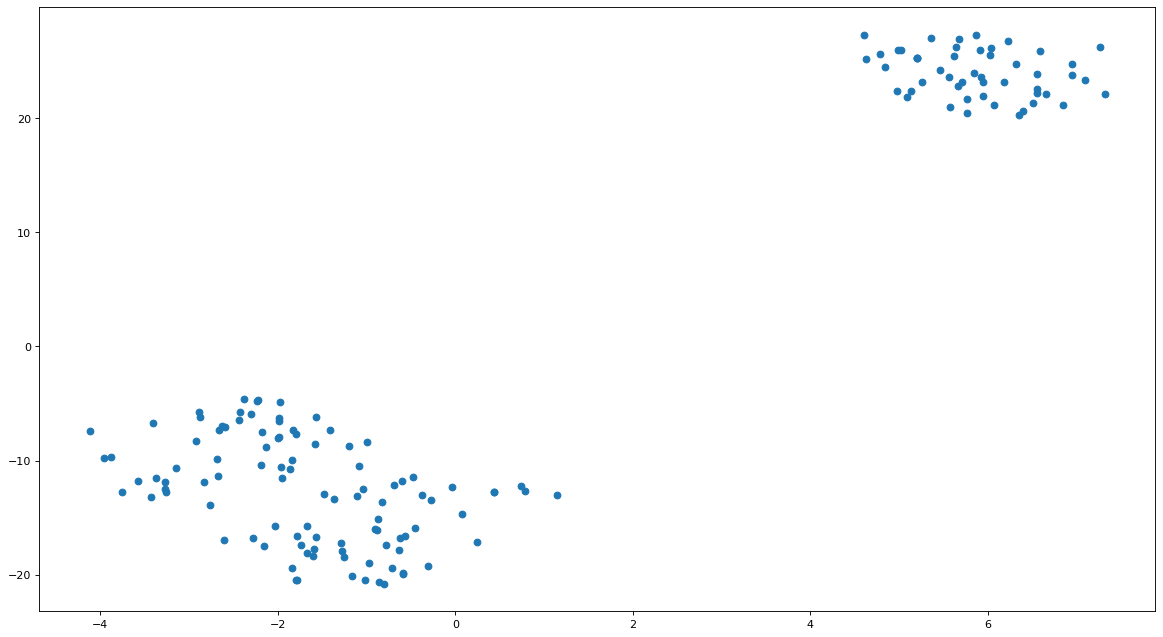

In [151]:
affinity_main = AffinityPropagation(random_state=2).fit(X)
pca_main = TSNE(n_components=2).fit_transform(X)
figure(figsize=(18, 10), dpi=80)
plt.scatter(pca_main.T[0], pca_main.T[1], cmap="viridis")

plt.show()

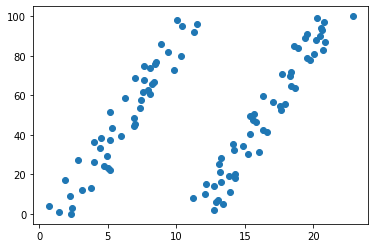

In [268]:
rng = np.random.default_rng(seed=42)
X_1=  np.linspace(0.0, 10.0, 100) + (rng.random((1, 100)) * 3)
Y_1 = np.linspace(0.0, 100.0, 100)
indexr = np.arange(0, 100, 1)
X_1[np.random.random(X_1.shape) < 0.5] += 10
plt.scatter(X_1, Y_1)

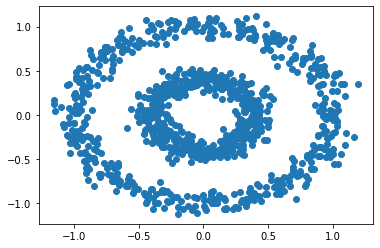

In [280]:
from sklearn.datasets import make_circles
X_2, Y_2 = make_circles(n_samples=1_000, factor=0.4, noise=0.07, random_state=0)
plt.scatter(X_2[:, 0], X_2[:, 1])

pd.DataFrame({'X': X_2[:, 0], "Y": X_2[:, 1]}).to_csv('Second_week_first_dataset.csv')

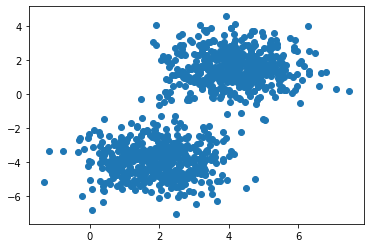

In [10]:
from sklearn.datasets import make_blobs
X_2, Y_2 = make_blobs(n_samples=1000, centers=2, n_features=2)
plt.scatter(X_2[:, 0], X_2[:, 1])

In [21]:
pd.DataFrame({'X': X_2[:, 0], "Y": X_2[:, 1]}).to_csv('test.csv')

In [16]:
import seaborn as sns
data = pd.DataFrame({'X': X_2[:, 0], "Y": X_2[:, 1]})


ValueError: Could not interpret value `x` for parameter `x`

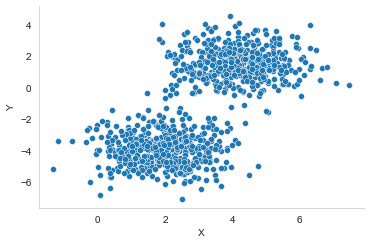

In [20]:
sns.set_style("whitegrid", {'axes.grid' : False})
base_beta = [-6, 0.62]
data['y_line'] = base_beta[0] + base_beta[1]*data['Y']
p1 = sns.relplot(kind='scatter', x='X', y='Y', data=data, height=3.5, aspect=1.5)
p1.map_dataframe(sns.lineplot, 'x', 'y_line', color='red')